# Анализ вакансий
**Часть 3**
## Извлечение требований в тексте вакансии

# 1. Служебный код
## 1.1. Импорт
### 1.1.1. Импорт библиотек

In [1]:
from importlib import reload
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
import warnings
import nltk

### 1.1.2. Импорт модулей

In [4]:
import config
reload(config)
from config import settings

import scripts.data_scripts.prepare_data as prep
reload(prep)

from scripts.data_scripts import clear_text as cl
reload(cl)

import scripts.utils.files as files
reload(files)

import scripts.model_scripts.text_process as proc
reload(proc)


<module 'scripts.model_scripts.text_process' from '/mnt/data/projects/active/urfu/vkr/scripts/model_scripts/text_process.py'>

## 1.2. Настройка параметров

In [2]:
pd.set_option("display.max_rows", 20)
pd.set_option("display.max_columns", 20)
pd.set_option("display.precision",6)
warnings.simplefilter("ignore")
sns.set_style("ticks",{'axes.grid' : True})

#Для корректного отображения графиков в ноутбуках используется команда %matplotlib inline
%matplotlib inline
# для корректного отображения графиков на тёмном фоне
plt.style.use('default')

In [ ]:
model_subdir = settings.get_fresh('BLOCK_MODELING_SUBDIR')
processed_subdir = settings.get_fresh('PROCESSED_LOCAL_SUBDIR')
nltk_dir  = settings.get_fresh('NLTK_DIR')

Загрузка стоп-слов и морфологического анализатора

In [5]:
nltk.download('punkt', download_dir=nltk_dir)
nltk.download('stopwords', download_dir=nltk_dir)

[nltk_data] Downloading package punkt to /var/lib/python/python_venvs/
[nltk_data]     torch_streamlit/lib/nltk_data/...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /var/lib/python/python_ve
[nltk_data]     nvs/torch_streamlit/lib/nltk_data/...
[nltk_data]   Package stopwords is already up-to-date!


True

# 2. Загрузка данных и общее описание набора данных
## 2.1 Загрузка данных

In [8]:
filename=settings.get_fresh('FILENAME_BLOCKS_SELECTED')
df=files.load_file(filename, processed_subdir, to_decompress=True, with_dates=False)

## 2.3. Информация о наборе данных

In [9]:
print(f'Строк - {df.shape[0]}\nСтолбцов - {df.shape[1]}')

Строк - 337861
Столбцов - 6


In [10]:
df

,id,title,content,content_type,semantic_type,block_id
0,42153070,Ждем от вас,опыт взаимодействия с командой разработки;\nоп...,1,3,11
1,42323563,Требования,Профильное образование не ниже средне-специаль...,1,3,4
2,42324314,Требования,Опыт на аналогичной должности – более 2 лет;\n...,1,3,5
3,42324314,"Будет плюсом, но не обязательно",Liquibase\nTestContainers\nJUnit,1,4,7
4,42352885,Что мы ожидаем от вас,Вы обладаете опытом коммерческой разработки пр...,1,3,4
...,...,...,...,...,...,...
337856,15568958,Требования,"креативность, работа в команде",1,3,4
337857,15569541,Что мы ожидаем от кандидата,"Знание HTML5, CSS3, JavaScript;\nЗнание хотя б...",1,3,6
337858,15569605,Наши пожелания к кандидатам,Иметь опыт работы по пунктам выше\nУметь и не ...,1,3,6
337859,13279864,Нам важно,Опыт разработки на Java от 2-х;\nОпыт работы с...,1,3,5


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 337861 entries, 0 to 337860
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   id             337861 non-null  int64 
 1   title          337861 non-null  object
 2   content        337860 non-null  object
 3   content_type   337861 non-null  int64 
 4   semantic_type  337861 non-null  int64 
 5   block_id       337861 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 15.5+ MB


# 3. Обработка текста
## 3.1. Извлечение требований

In [22]:
# list_items = proc.parse_requirements(df)

Извлечение требований выполнялось в скрипте 'parse_requirements.py'.
Загрузка извлеченных требований:

In [12]:
filename=settings.get_fresh('FILENAME_REQUIREMENT_EXTRACTED')
list_items=files.load_file(filename, model_subdir, to_decompress=True, with_dates=False)
list_items.drop(list_items[list_items.list_item.isna()].index, inplace=True)

In [15]:
list_items

,id,block_id,semantic_type,list_item
0,42153070,11,3,опыт взаимодействия с командой разработки
1,42153070,11,3,опыт работы с реляционными БД SQL для формиров...
2,42153070,11,3,опыт работы с функциональными требования для ф...
3,42153070,11,3,опыт подготовки проектной документации техниче...
4,42153070,11,3,операционные инструкции
...,...,...,...,...
3926025,13279864,7,4,Integration
3926026,13279864,7,4,Опыт работы c SOAP WEB Service
3926027,13279864,7,4,Представление о современных методологиях разра...
3926028,13279864,7,4,непрерывная интеграция


In [16]:
list_items.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3926029 entries, 0 to 3926029
Data columns (total 4 columns):
 #   Column         Dtype 
---  ------         ----- 
 0   id             int64 
 1   block_id       int64 
 2   semantic_type  int64 
 3   list_item      object
dtypes: int64(3), object(1)
memory usage: 149.8+ MB


In [17]:
list_items[list_items.list_item.isna()]

,id,block_id,semantic_type,list_item


Анализ показал, что было извлечено около 4 млн. выражений, содержащих требования к знаниям и навыкам соискателей. Далее проведем небольшой анализ извлеченных данных.

 5. Исследовательский анализ данных (exploratory data analysis - EDA)

## 3.2. Популярность навыков:

In [18]:
list_item_counts = list_items['list_item'].value_counts()

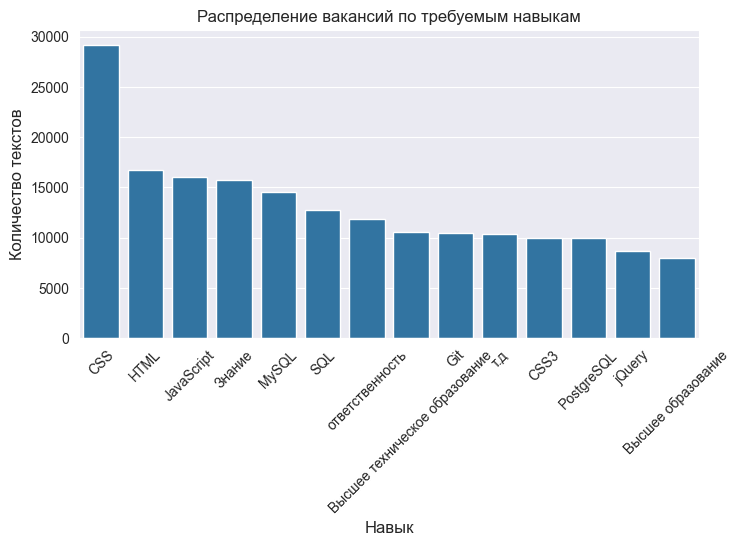

In [19]:
plt.figure(figsize=(8, 4))
sns.barplot(x=list_item_counts.head(14).index, y=list_item_counts.head(14).values)
plt.title('Распределение вакансий по требуемым навыкам')
plt.ylabel('Количество текстов', fontsize=12)
plt.xlabel('Навык', fontsize=12)
plt.xticks(rotation=45)
plt.show()

In [20]:
print(f'Всего уникальных требований: {list_item_counts.shape[0]}')

Всего уникальных требований: 839596


Всего было обнаружено свыше 500 тыс. различных уникальных требований. Однако часть из них является шумом и выбросами, вследствие того, что иногда работодатели пишут в своих объявлениях пожелания, не связанные напрямую с требованиями к соискателю (выбросы), а также из-за наличия различных стоп-слов (шум). Далее этот список будет очищен и от того, и от другого.

Много неуникальных требований. Совпадения требований в разных объявлениях:

In [21]:
list_items[list_items['list_item'].duplicated(keep=False)].sort_values(by='list_item', ascending=True, ignore_index=True)

,id,block_id,semantic_type,list_item
0,30632720,7,3,*BSD
1,30632723,7,3,*BSD
2,30632723,9,4,*BSD
3,30632720,9,4,*BSD
4,25777338,7,3,*BSD
...,...,...,...,...
3447474,34383993,9,4,ячеистый склад
3447475,34859365,4,3,ячейки
3447476,33988435,5,3,ячейки
3447477,27084884,4,3,ячейки


Дублирующиеся требования будут удалены перед извлечением навыков.

Немного статистики:

In [22]:
# Количество букв в каждом тексте
list_items["letter_count"]=list_items['list_item'].apply(len)

In [23]:
print("Максимальная длина текста: ",list_items.letter_count.max())
print("Минимальная длина текста: ",list_items.letter_count.min())
print("Средняя длина текста: ",round(list_items.letter_count.mean()))

Максимальная длина текста:  417
Минимальная длина текста:  2
Средняя длина текста:  23


Длина текстов в словах

In [24]:
# Количество слов в каждом тексте
list_items['word_count']=list_items['list_item'].astype(str).str.split().map(lambda x: len(x))
print("Максимальная длина текста: ",list_items.word_count.max())
print("Минимальная длина текста: ",list_items.word_count.min())
print("Средняя длина текста: ",round(list_items.word_count.mean()))
print("Медиана длины текста: ",round(list_items.word_count.median()))

Максимальная длина текста:  55
Минимальная длина текста:  1
Средняя длина текста:  3
Медиана длины текста:  3


Общая статистика

In [25]:
list_items.describe()

,id,block_id,semantic_type,letter_count,word_count
count,3.926029e+06,3.926029e+06,3.926029e+06,3.926029e+06,3.926029e+06
mean,3.322747e+07,6.078560e+00,3.146002e+00,2.334435e+01,3.221416e+00
std,9.458135e+06,2.702082e+00,3.531085e-01,1.761126e+01,2.324597e+00
min,5.687789e+06,1.000000e+00,3.000000e+00,2.000000e+00,1.000000e+00
25%,2.577736e+07,4.000000e+00,3.000000e+00,9.000000e+00,1.000000e+00
50%,3.451077e+07,5.000000e+00,3.000000e+00,2.000000e+01,3.000000e+00
75%,3.979828e+07,7.000000e+00,3.000000e+00,3.300000e+01,4.000000e+00
max,5.415552e+07,4.800000e+01,4.000000e+00,4.170000e+02,5.500000e+01


In [26]:
print("Всего символов: ", list_items.letter_count.sum())
print("Всего слов: ", list_items.word_count.sum())

Всего символов:  91650610
Всего слов:  12647371


In [27]:
print("Всего униграмм: ",list_items[list_items.word_count==1].shape[0])
print("Всего биграмм: ",list_items[list_items.word_count==2].shape[0])
print("Всего триграмм: ",list_items[list_items.word_count==3].shape[0])

Всего униграмм:  1200608
Всего биграмм:  653994
Всего триграмм:  577229


В текстах от 1 до 55 слов, в среднем 3 слова, верхнему квартилю соответствует значение 4.
Аналогично, в текстах от 2 до 417 символов, в среднем 23, верхнему квартилю соответствует значение 33.
Анализ показывает, что среди найденных фраз больше всего униграмм, однако биграмм и триграмм также много, и в сумме их количество примерно равно количеству униграмм.
Поэтому для дальнейшего анализа будут использоваться униграммы, биграммы и триграммы.

Токенизация требований выполняется в файле 'tokenize_requirements.py'.

In [87]:
# list_items.drop(list_items[list_items['list_item'].duplicated(keep='last')].index, inplace=True)

In [34]:
filename = settings.get_fresh('FILENAME_REQUIREMENTS_TOKENIZED')
requirements_dict=files.load_data_dump(filename, model_subdir)

In [35]:
list_items_tok = pd.DataFrame.from_dict(requirements_dict, "index")

In [49]:
# list_items_tok=files.load_file(filename, model_subdir, to_decompress=True, with_dates=False)

In [36]:
list_items_tok.head(10)

,count,canonical,unigrams,bigrams,trigrams
опыт_взаимодействие_команда_разработка,42,опыт взаимодействия с командой разработки,"[опыт, взаимодействие, команда, разработка]","[(опыт, взаимодействие), (взаимодействие, кома...","[(опыт, взаимодействие, команда), (взаимодейст..."
опыт_работа_реляционный_бд_sql_формирование_постановка_разработчик_написание_sql_запрос,1,опыт работы с реляционными БД SQL для формиров...,"[опыт, работа, реляционный, бд, sql, формирова...","[(опыт, работа), (работа, реляционный), (реляц...","[(опыт, работа, реляционный), (работа, реляцио..."
опыт_работа_функциональный_требование_формирование_тз,1,опыт работы с функциональными требования для ф...,"[опыт, работа, функциональный, требование, фор...","[(опыт, работа), (работа, функциональный), (фу...","[(опыт, работа, функциональный), (работа, функ..."
опыт_подготовка_проектный_документация_технический_задание_разработка,1,опыт подготовки проектной документации техниче...,"[опыт, подготовка, проектный, документация, те...","[(опыт, подготовка), (подготовка, проектный), ...","[(опыт, подготовка, проектный), (подготовка, п..."
операционный_инструкция,15,операционные инструкции,"[операционный, инструкция]","[(операционный, инструкция)]",[]
знание_принцип_разработка,81,знание принципов разработки ПО,"[знание, принцип, разработка]","[(знание, принцип), (принцип, разработка)]","[(знание, принцип, разработка)]"
проектирование_приложение_часть_бд_плюс_навык_работа_система_проектирование_логический,1,проектирования приложений в части БД плюсом бу...,"[проектирование, приложение, часть, бд, плюс, ...","[(проектирование, приложение), (приложение, ча...","[(проектирование, приложение, часть), (приложе..."
физичеcкий_модель_данные,1,физичеcких моделей данных,"[физичеcкий, модель, данные]","[(физичеcкий, модель), (модель, данные)]","[(физичеcкий, модель, данные)]"
например,975,например,[например],[],[]
sap_power_designer,2,SAP Power Designer,"[sap, power, designer]","[(sap, power), (power, designer)]","[(sap, power, designer)]"


In [37]:
list_items_tok.info()

<class 'pandas.core.frame.DataFrame'>
Index: 669431 entries, опыт_взаимодействие_команда_разработка to опыт_работа_c_soap_web_service
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   count      669431 non-null  int64 
 1   canonical  669431 non-null  object
 2   unigrams   669431 non-null  object
 3   bigrams    669431 non-null  object
 4   trigrams   669431 non-null  object
dtypes: int64(1), object(4)
memory usage: 30.6+ MB


Небольшая стсатистика использования наиболее популярных фраз:

In [38]:
unigrams_counter = Counter()
bigrams_counter = Counter()
trigrams_counter = Counter()
for key in requirements_dict:
     for token in requirements_dict[key]['unigrams']:
        unigrams_counter.update({token: requirements_dict[key]['count']})
     for token in requirements_dict[key]['bigrams']:
        bigrams_counter.update({token: requirements_dict[key]['count']})
     for token in requirements_dict[key]['trigrams']:
        trigrams_counter.update({token: requirements_dict[key]['count']})

In [39]:
def plot_counter(counter, n, image_name=None):
    tokens= [token for token in counter.most_common(20)]
    if n==1:
        x = [token[0] for token in tokens]
    else:
        x = ['+'.join(token[0]) for token in tokens]
    y = [token[1] for token in tokens]
    fig = plt.figure(figsize = (25,15))
    plt.bar(x,y)
    plt.xticks(fontsize=25, rotation=45, ha="right")
    plt.yticks(fontsize=25)
    plt.xlabel("Токены", fontsize =25)
    plt.ylabel("Количество", fontsize =25)
    # plt.savefig(image_name+".pdf")
    plt.show()

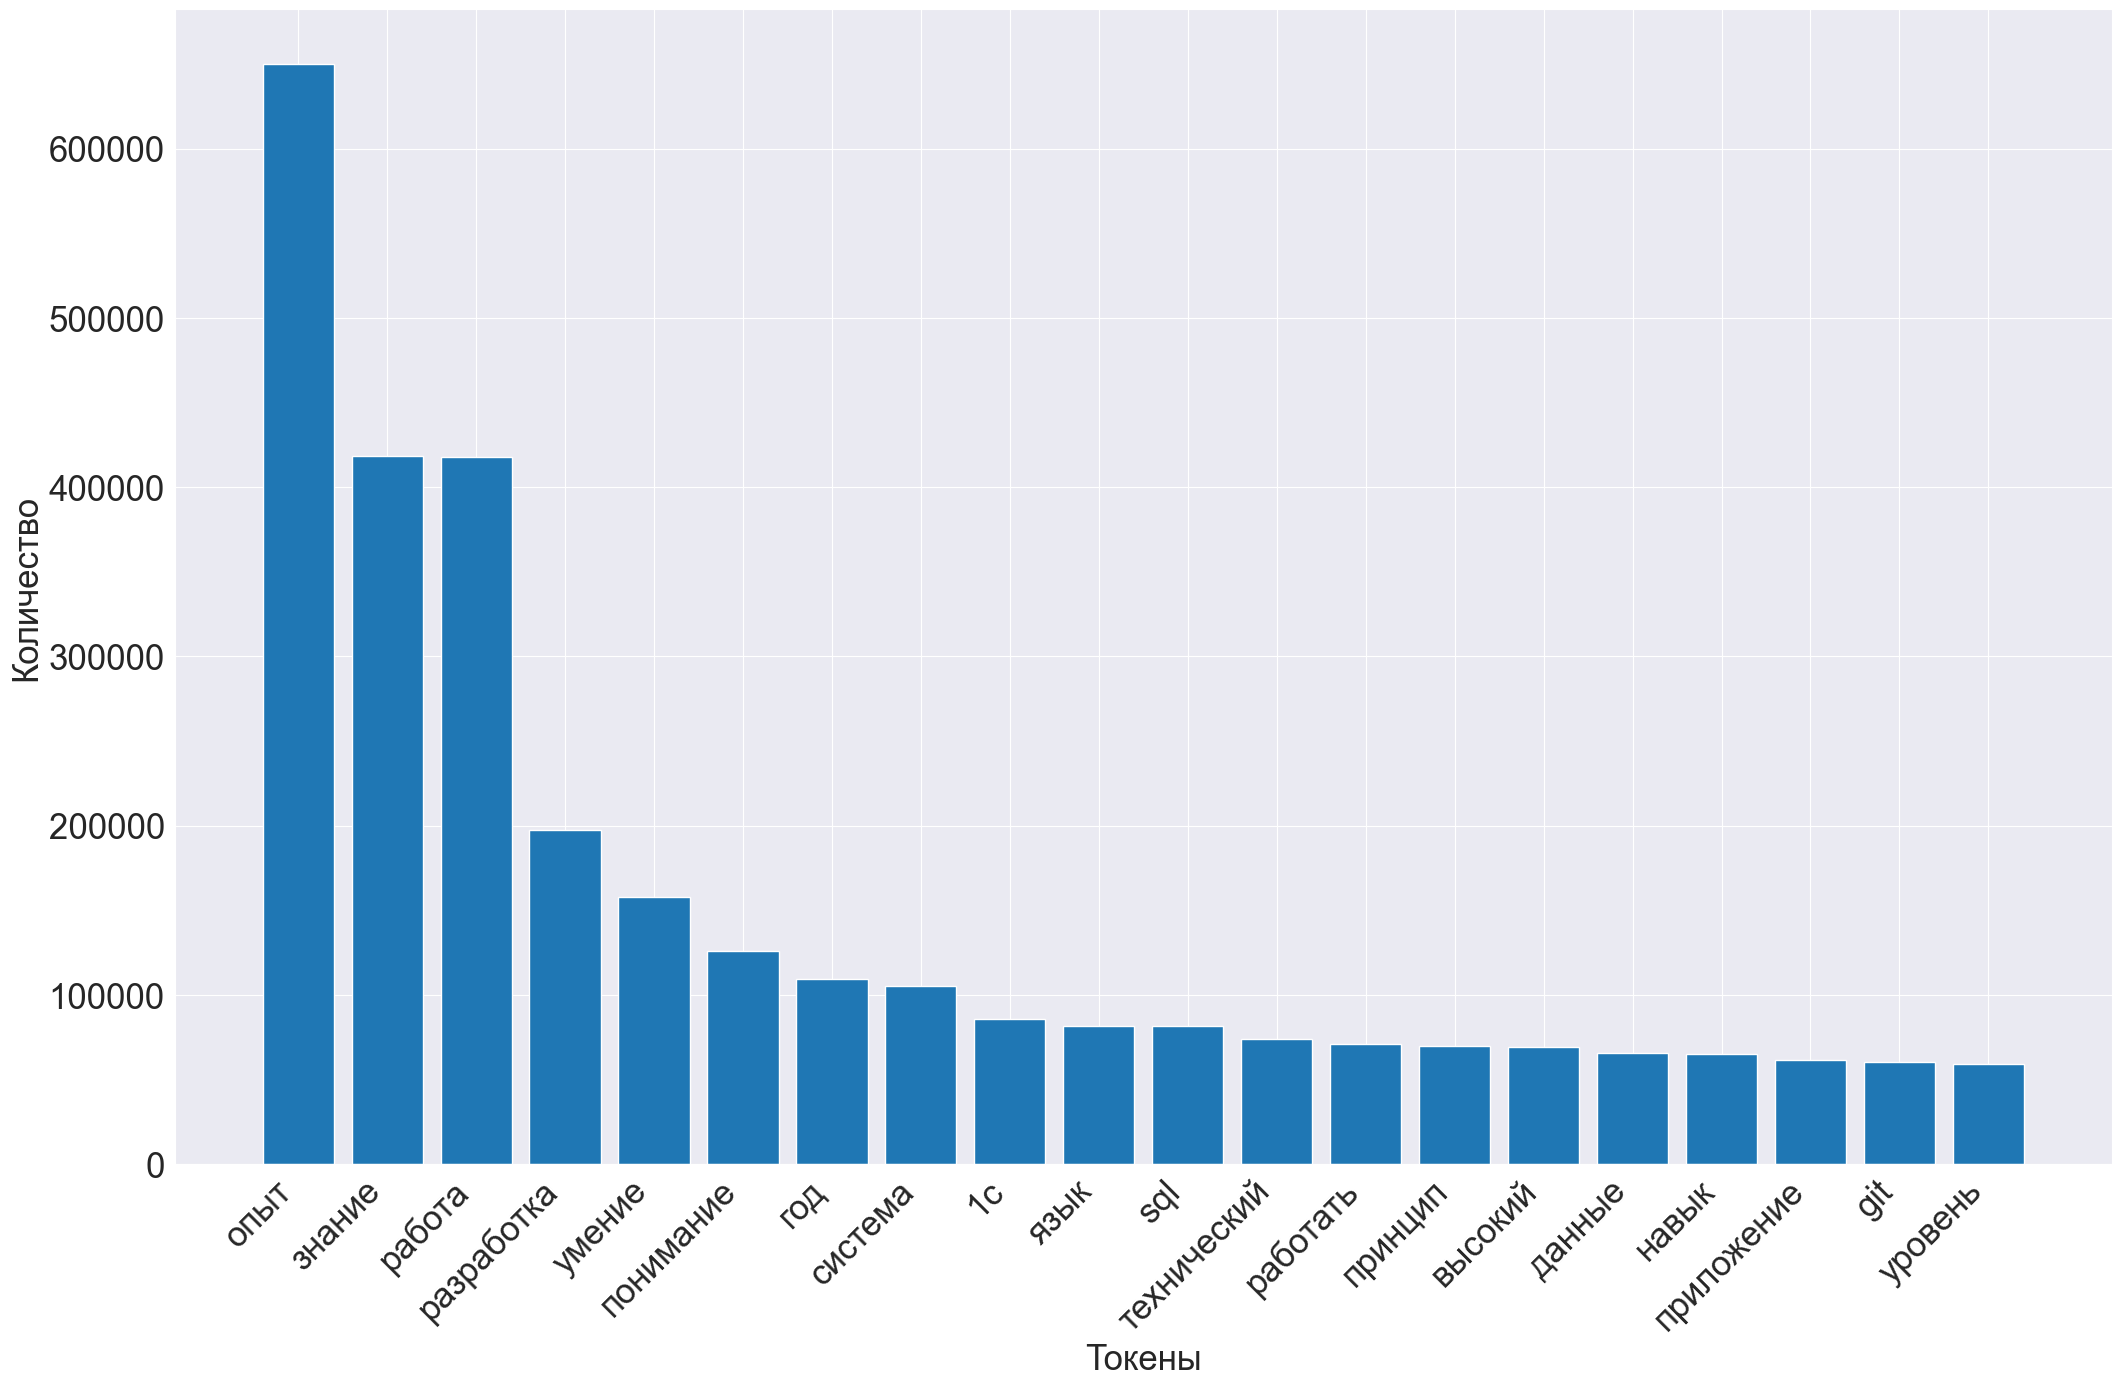

In [40]:
plot_counter(unigrams_counter,1,"Юниграммы")

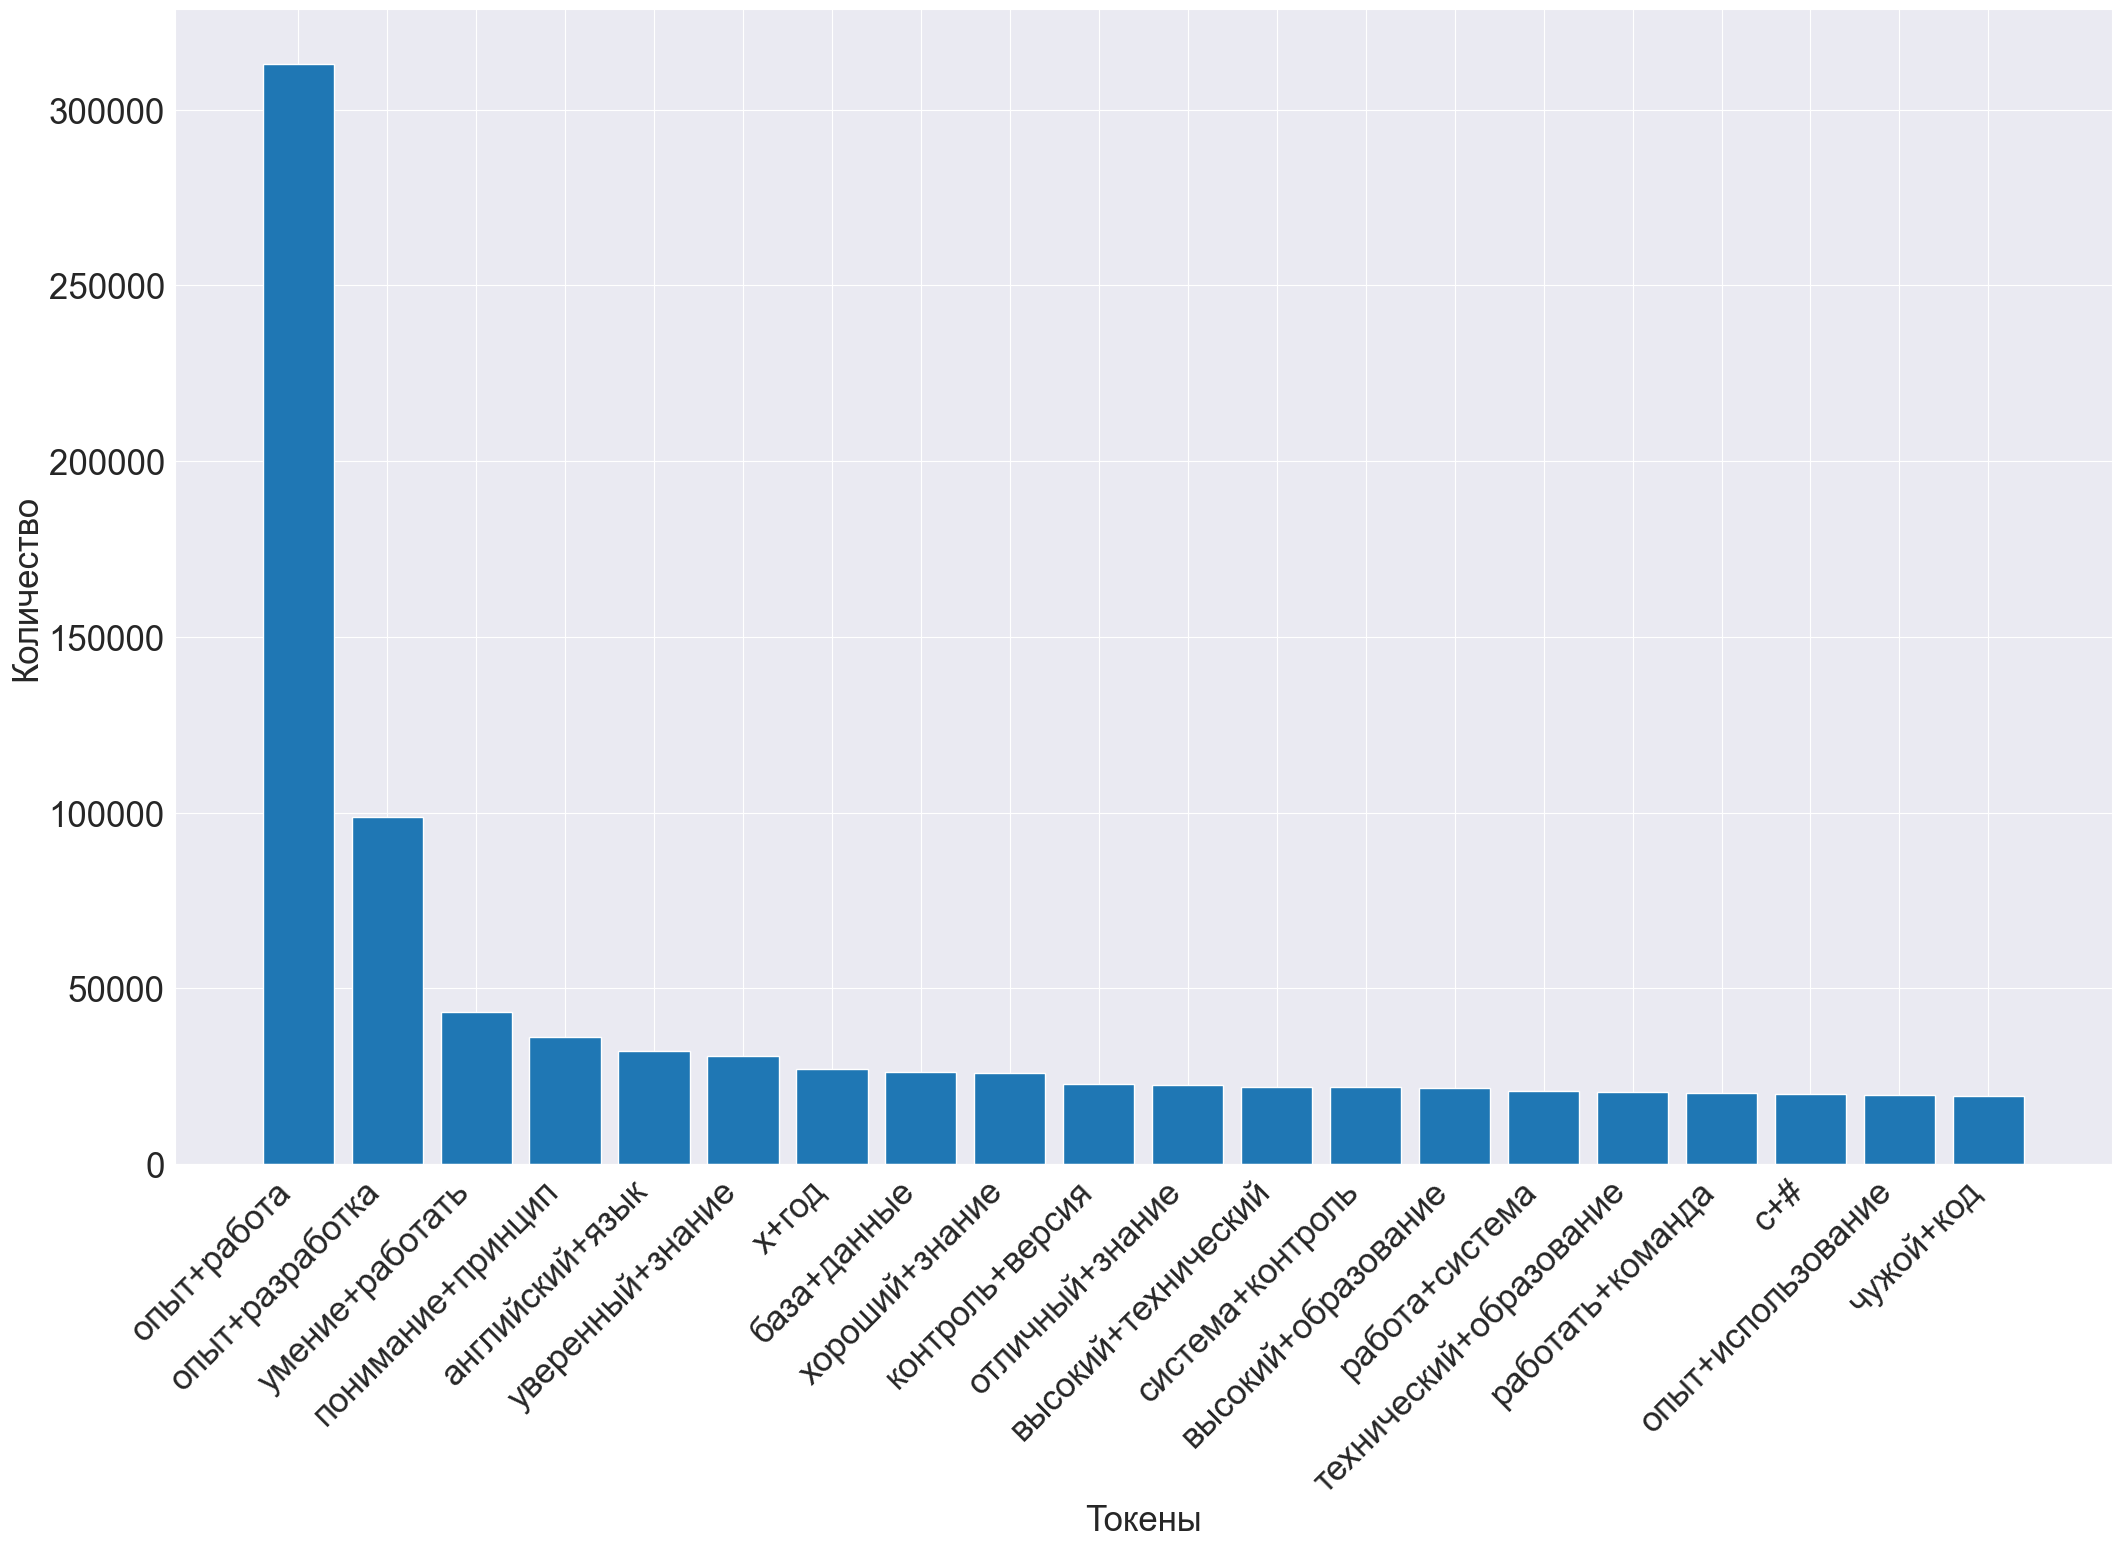

In [41]:
plot_counter(bigrams_counter,"Биграммы")

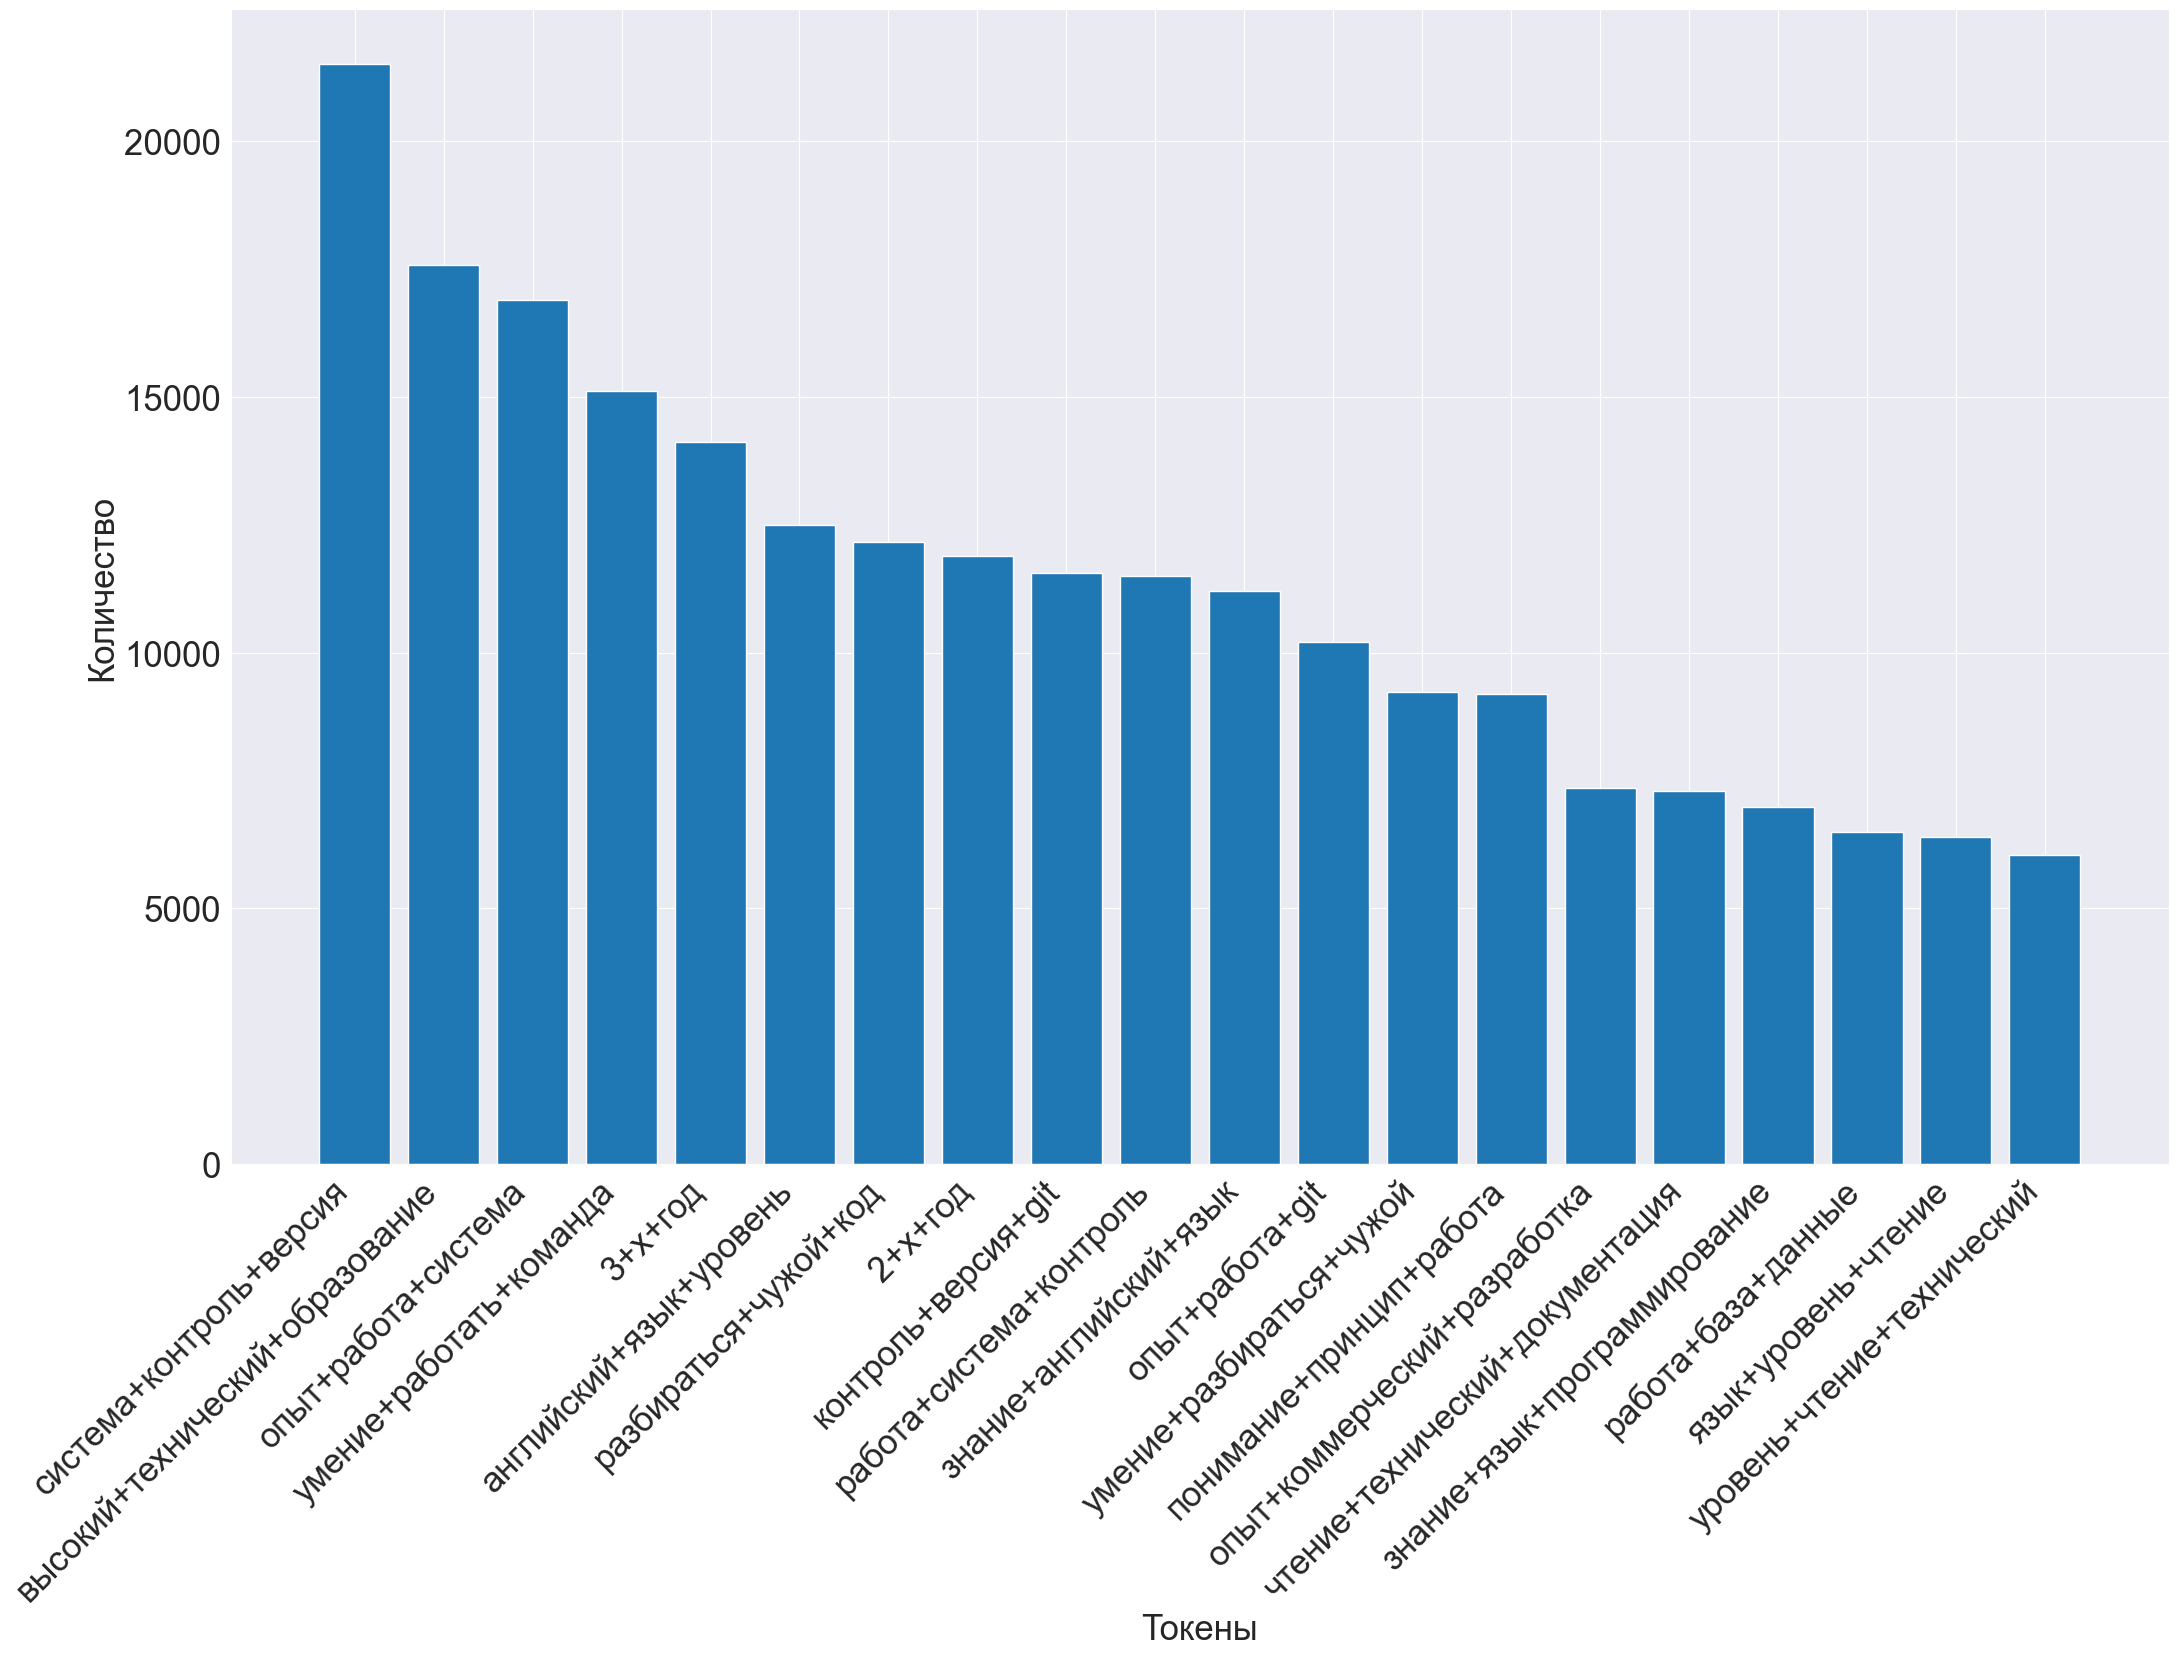

In [42]:
plot_counter(trigrams_counter,"Триграммы")

Самыми популярными требованиями оказались опыт работы и системы контроля версий.